# PREGUNTA 1

---

# Configuración y Visualización del Entorno

## Configuración de las Rutas de Importación

Se añade el directorio padre (..) al path (sys.path), lo que permite al entorno de Python acceder a módulos o paquetes ubicados en directorios superiores al actual. Esto es útil para poder importar scripts o paquetes personalizados sin tener que mover ficheros o el directorio de trabajo.

In [3]:
import sys
sys.path.insert(0, '..')

## Verificación de las Versiones de los Paquetes

Se utiliza la función check_packages() para verificar que los paquetes y sus respectivas versiones indicadas en el diccionario 'd' estén instalados correctamente dentro del entorno. Este paso es importante para verificar la compatibilidad de cada paquete para poder evitar errores por diferencia de versión.

In [4]:
from python_environment_check import check_packages
d = {
    'numpy': '1.21.2',
    'scipy': '1.7.0',
    'mlxtend' : '0.19.0',
    'matplotlib': '3.4.3',
    'sklearn': '1.0',
    'pandas': '1.3.2'
}
check_packages(d)

[OK] Your Python version is 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
[OK] numpy 1.24.3
[OK] scipy 1.8.0
[OK] mlxtend 0.23.1
[OK] matplotlib 3.5.1
[OK] sklearn 1.5.2
[OK] pandas 2.2.2


## Importación de Paquetes

Se importan los paquetes esenciales para analizar y visualizar datos: numpy para cálculos numéricos, pandas para manipular datos y matplotlib.pyplot para visualizar gráficos.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---

# Código Fuente

In [6]:
columns = ['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Target']
df = pd.read_csv("dataset_classification.csv", 
                 sep=',',
                 usecols=columns)
pd.set_option('display.max_columns', len(df.columns))
df.columns
df.shape
df.head(1)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Col1    1728 non-null   int64
 1   Col2    1728 non-null   int64
 2   Col3    1728 non-null   int64
 3   Col4    1728 non-null   int64
 4   Col5    1728 non-null   int64
 5   Col6    1728 non-null   int64
 6   Target  1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


,Col1,Col2,Col3,Col4,Col5,Col6,Target
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,2.500000,2.000000,2.000000,2.500000,2.000000,2.500000,1.417245
std,1.118358,0.816733,0.816733,1.118358,0.816733,1.118358,0.747188
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.750000,1.000000,1.000000,1.750000,1.000000,1.750000,1.000000
50%,2.500000,2.000000,2.000000,2.500000,2.000000,2.500000,1.000000
75%,3.250000,3.000000,3.000000,3.250000,3.000000,3.250000,2.000000
max,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000


In [7]:
dataset_classification_anonymized = df.drop(["Target"], axis=1)
dataset_classification_anonymized.to_csv('dataset_classification_anonymized.csv', index=False)
dataset_classification_anonymized.corr()

,Col1,Col2,Col3,Col4,Col5,Col6
Col1,1.000000e+00,-7.136661e-17,9.276252e-17,2.241006e-17,5.806663e-17,-2.210166e-17
Col2,-7.136661e-17,1.000000e+00,9.367507e-17,-4.701469e-17,4.684677e-17,-3.293844e-17
Col3,9.276252e-17,9.367507e-17,1.000000e+00,1.254194e-16,-4.568295e-17,9.402938e-17
Col4,2.241006e-17,-4.701469e-17,1.254194e-16,1.000000e+00,1.518145e-16,-9.765851e-17
Col5,5.806663e-17,4.684677e-17,-4.568295e-17,1.518145e-16,1.000000e+00,-3.652788e-17
Col6,-2.210166e-17,-3.293844e-17,9.402938e-17,-9.765851e-17,-3.652788e-17,1.000000e+00


In [8]:
X = dataset_classification_anonymized
y = df.get("Target")
print('Class labels:', np.unique(y))

Class labels: [1 2 3 4]


<AxesSubplot:>

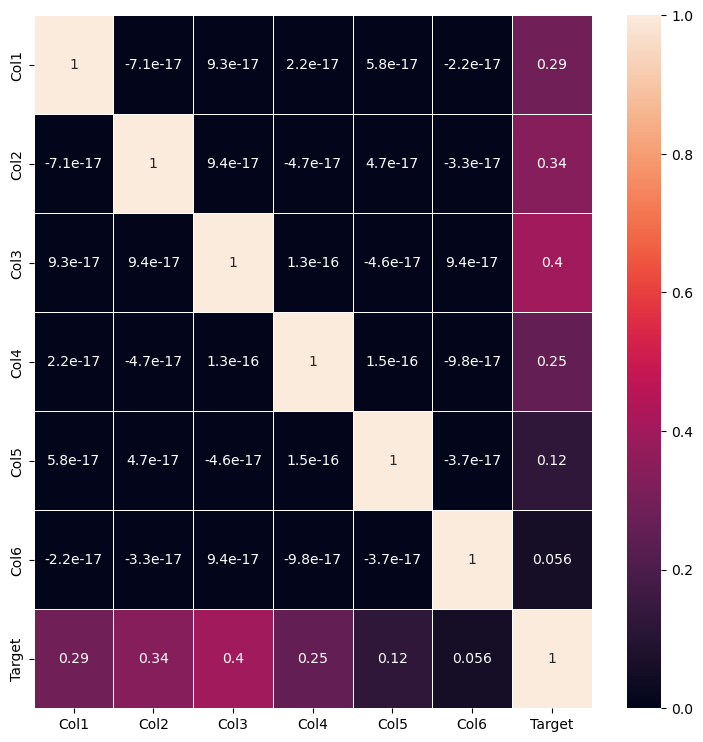

In [9]:
import seaborn as sb
fig, ax = plt.subplots(figsize=(9,9))
sb.heatmap(df.corr(), linewidth = 0.5, annot=True)

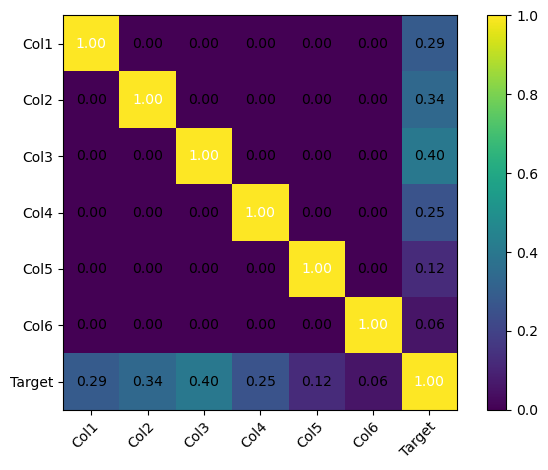

In [10]:
from mlxtend.plotting import heatmap
cm = np.corrcoef(df.values.T)
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)
plt.tight_layout()
plt.show()

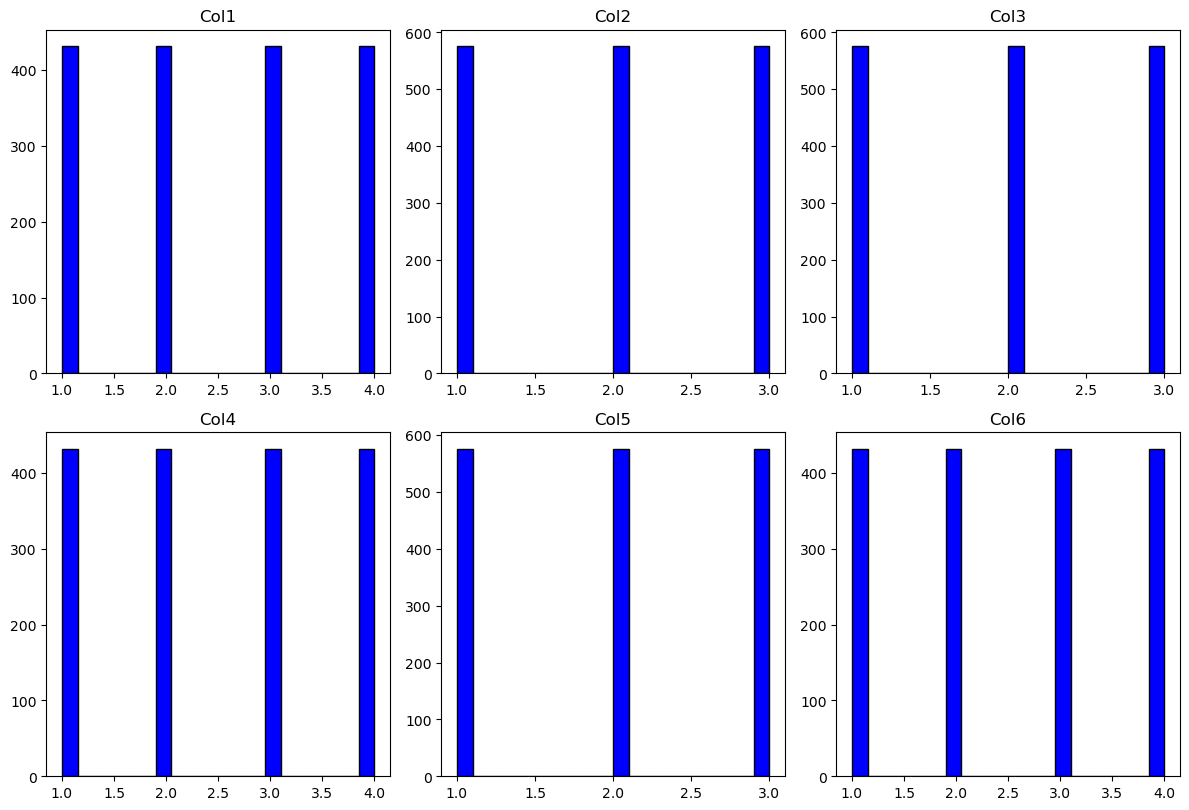

In [11]:
columns = dataset_classification_anonymized.columns
fig = plt.figure(figsize=(12,12))
for i in range(0,6):
  ax = plt.subplot(3,3,i+1)
  ax.hist(dataset_classification_anonymized[columns[i]],bins = 20, color='blue', edgecolor='black')
  ax.set_title(dataset_classification_anonymized.head(0)[columns[i]].name)
plt.tight_layout()
plt.show()

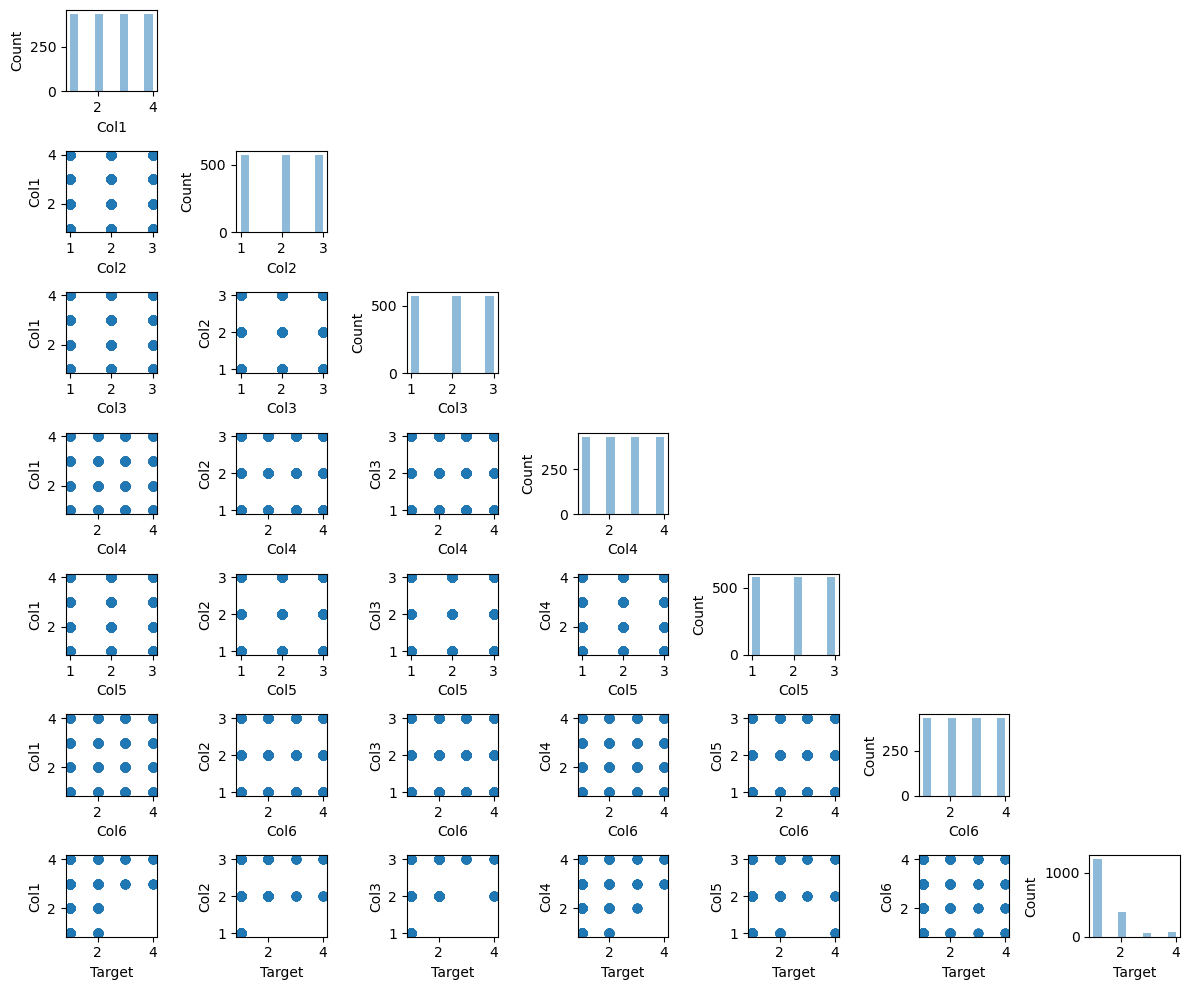

In [12]:
from mlxtend.plotting import scatterplotmatrix
scatterplotmatrix(df.values, figsize=(12, 10), 
                  names=df.columns, alpha=0.5)
plt.tight_layout()
plt.show()

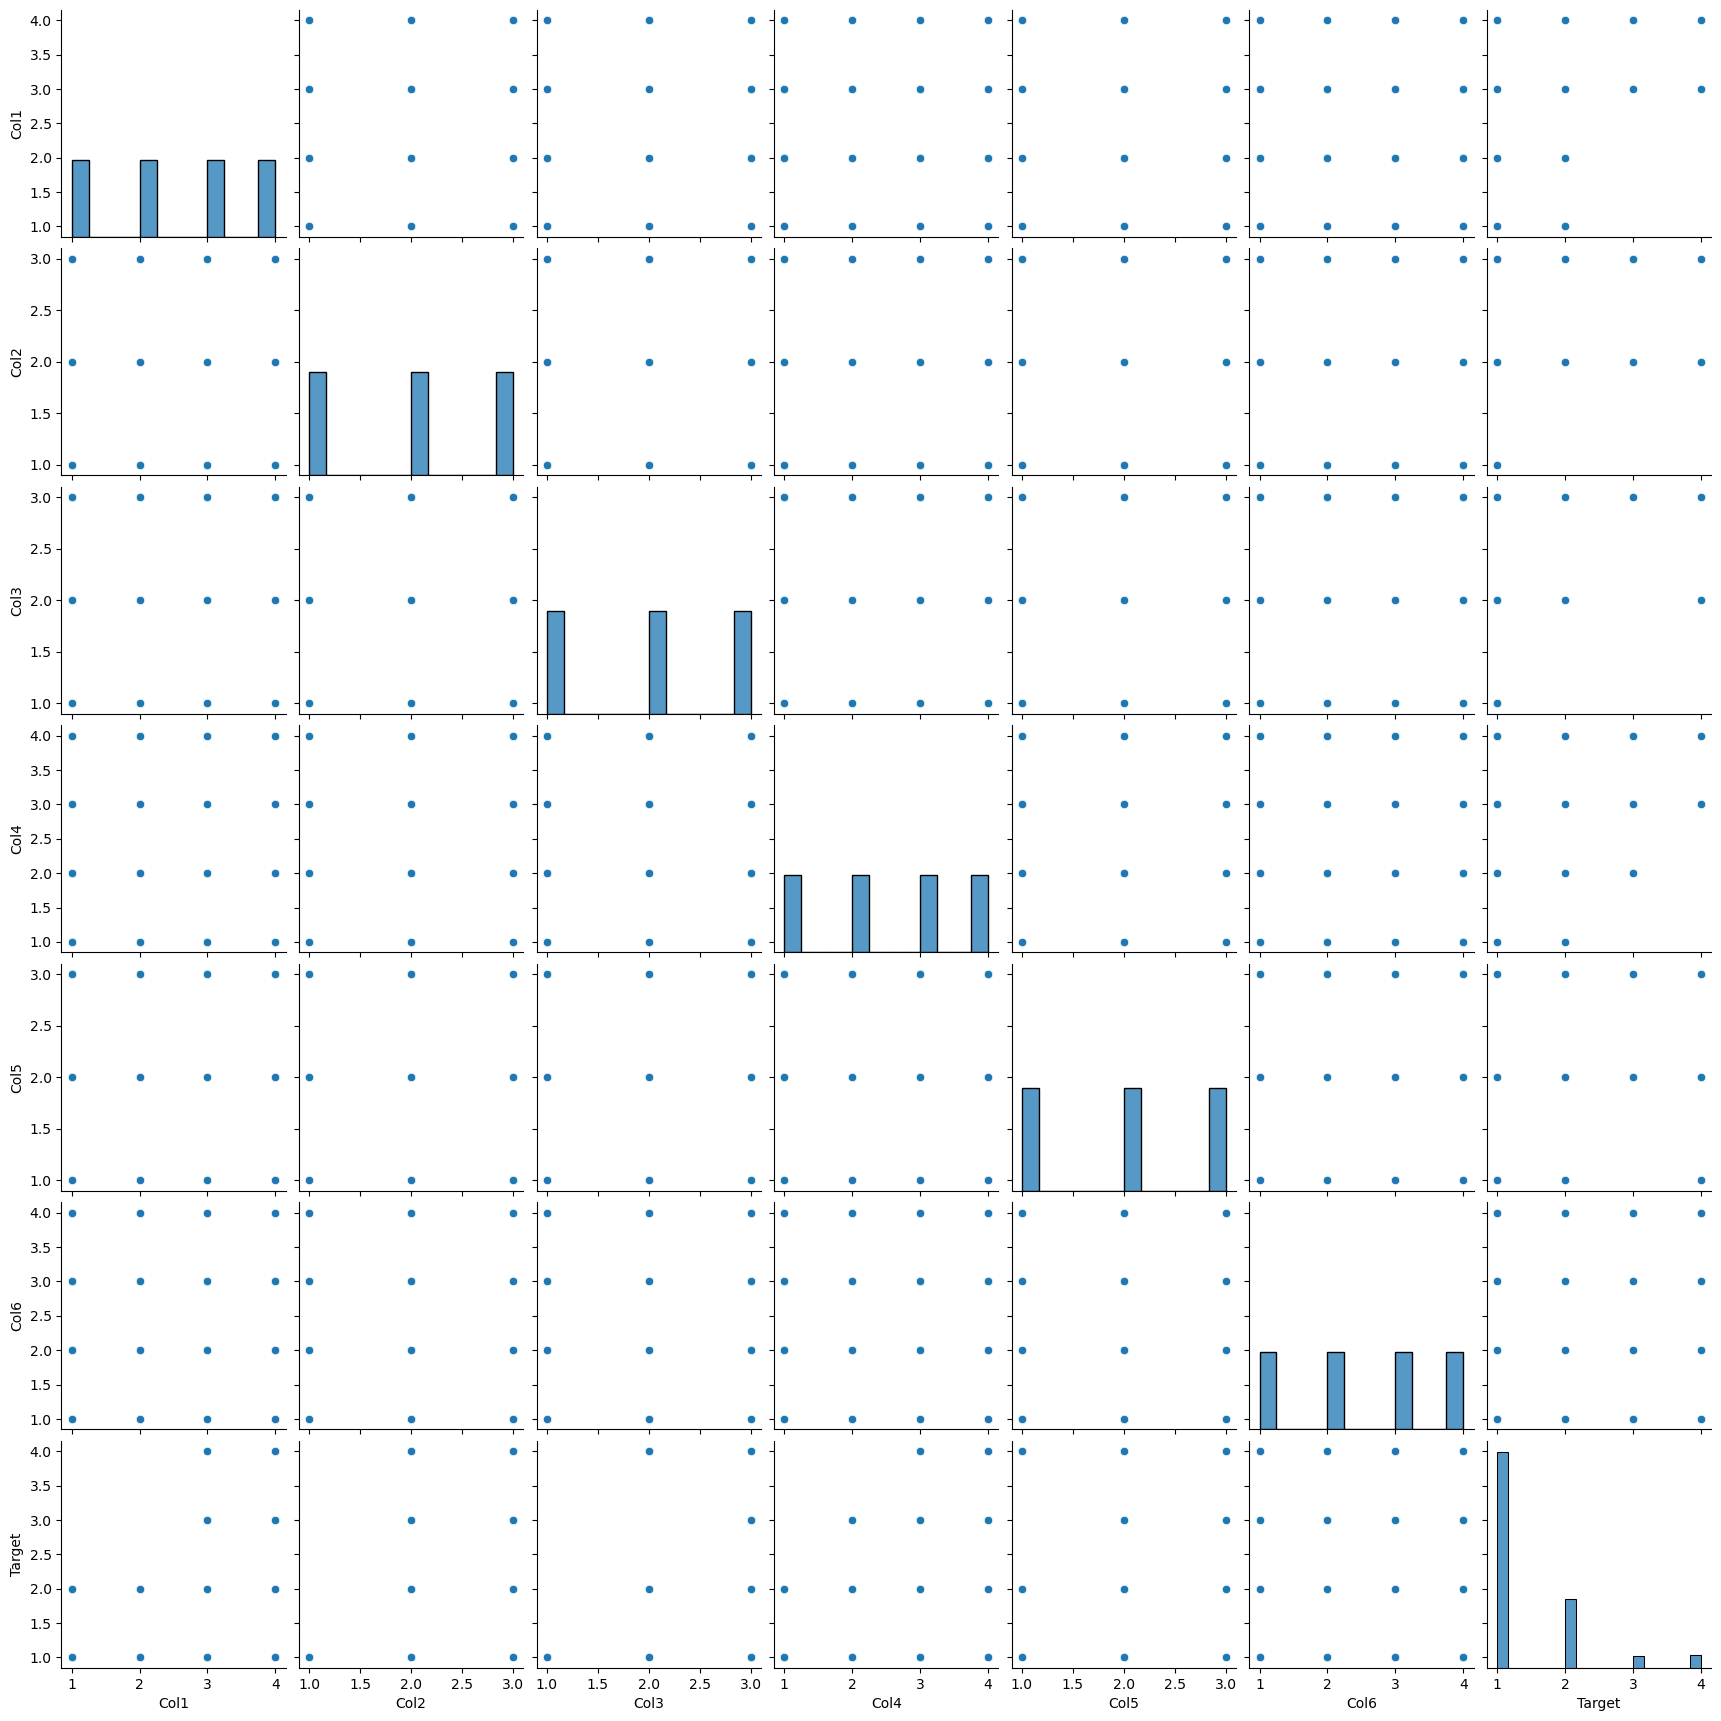

In [13]:
import seaborn as sb
sb.pairplot(df)
plt.show()

---

# Convertir Jupyter Notebook a Fichero Python

In [14]:
! python .convert_notebook_to_script.py --input answer1.ipynb --output answer1.py

[NbConvertApp] Converting notebook answer1.ipynb to script
[NbConvertApp] Writing 3226 bytes to answer1.py
